In [2]:
import numpy as np
import pandas as pd


url = 'https://raw.githubusercontent.com/kedeisha1/Challenges/main/coaster_db.csv'

df = pd.read_csv(url) 

**1.    How many columns and rows are in the dataset?**

In [8]:
print(f"Dataframe dimension : {df.shape}")
print(f"number of rows : {df.shape[0]}")
 
print(f"number of columns : {df.shape[1]}")

Dataframe dimension : (1087, 56)
number of rows : 1087
number of columns : 56


**2.    Is there any missing data?**

**This shows the count of missing data under each column**

In [10]:
df.isnull().sum()

coaster_name                        0
Length                            134
Speed                             150
Location                            0
Status                            213
Opening date                      250
Type                                0
Manufacturer                       59
Height restriction                256
Model                             343
Height                            122
Inversions                        155
Lift/launch system                292
Cost                              705
Trains                            369
Park section                      600
Duration                          322
Capacity                          512
G-force                           725
Designer                          509
Max vertical angle                730
Drop                              593
Soft opening date                 991
Fast Lane available              1018
Replaced                          914
Track layout                      752
Fastrack ava

**3.    Display the summary statistics of the numeric columns using the describe method.**

In [14]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


**4.    Rename the following columns:** <br> 
       -  coaster_name  ➡️  Coaster_Name <br>
       -  year_introduced ➡️ Year_Introduced <br>
       -  opening_date_clean ➡️ Opening_Date <br>
       -  speed_mph ➡️ Speed_mph <br> 
       -  height_ft ➡️ Height_ft <br>
       -  Inversions_clean ➡️ Inversions <br>
       -  Gforce_clean ➡️ Gforce

In [15]:
df.rename(columns={'coaster_name': 'Coaster_Name', 'year_introduced': 'Year_Introduced','opening_date_clean':'Opening_Date','speed_mph':'Speed_mph','height_ft':'Height_ft','Inversions_clean':'Inversions','Gforce_clean':'Gforce'}, inplace=True)

In [16]:
df.columns

Index(['Coaster_Name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'Year_Introduced', 'latitude', 'longitude', 'Type_Main', 'Opening_Date',
       'speed1', 'speed2', 'speed1_value', 'speed1_unit', 'Speed_mph',
       'height_value', 'height_unit', 'Height_ft', 'Inversions', 'Gforce'],
      dtype='object')

**5.    Are there any duplicated rows?**

In [19]:
df[df.duplicated()]

,Coaster_Name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,Speed_mph,height_value,height_unit,Height_ft,Inversions,Gforce


**6.    What are the top 3 years with the most roller coasters introduced?** <br>
       Chart shows of the top 3 years were 1999, 2000 and 1998.

<AxesSubplot:>

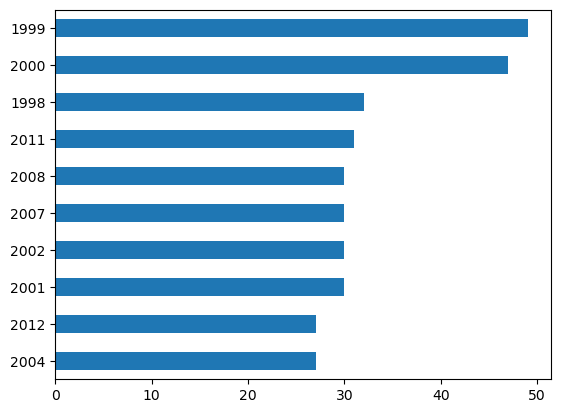

In [34]:
df.Year_Introduced.value_counts()[:10].sort_values().plot(kind='barh')

**7.    What is the average speed? Also display a plot to show it's distribution.** <br>
The average speed is

 Average speed is 48.62



<AxesSubplot:ylabel='Density'>

None

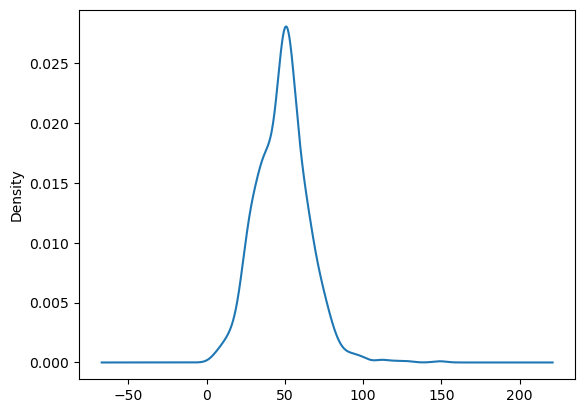

In [52]:
display(df.Speed_mph.plot(kind='kde'),print(f'\033[1m Average speed is {np.round(df.Speed_mph.mean(),2)}\n'))

**8.    Explore the feature relationships. Are there any positively or negatively correlated relationships?**

There is strong positive relationship bewteen Speed_mph and Height Ft. Also G-force has moderate positive relationship with Inversions,Height,and Speed features.

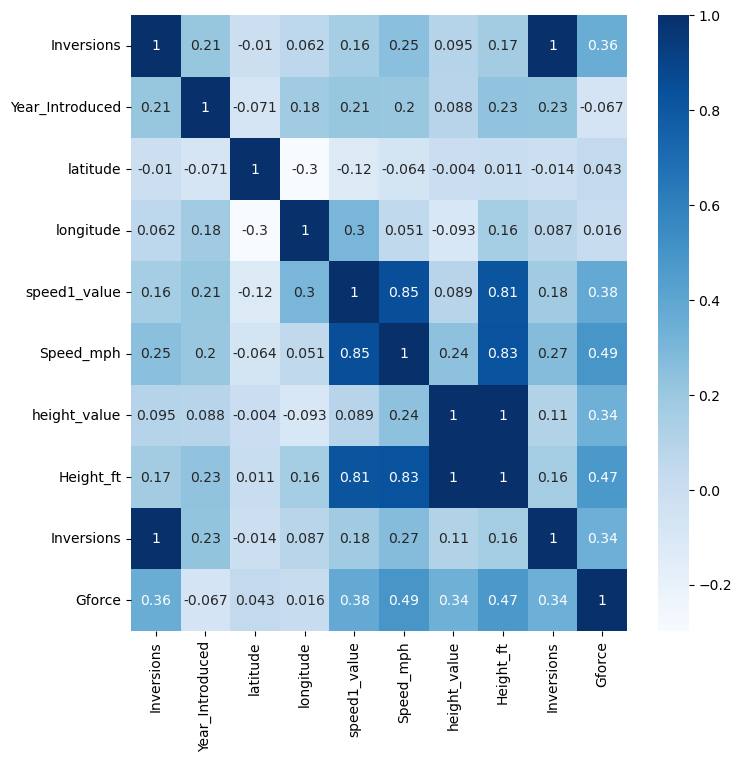

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn

fig, ax = plt.subplots(figsize=(8,8))
corr = df.corr().round(3)
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()